In [1]:
import numpy as np
import scipy as sp
import time

import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression


np.set_printoptions(precision=1)

In [2]:
for m in range(6,25):
    pairs = []
    for i in range(2,m+1):
        pairs.append([i,m-i+2])
    #print(len(pairs))     

In [3]:
def A(r):
    return np.exp(np.pi*1j/r)

def S(i):
    arr = []
    k = -(i-1)/2
    for j in range(i):
        arr.append(k)
        k = k+1
    return arr



In [4]:
def RTpower3(r,p,i,k):
    power = int((p*3*(i**2-1)/2-2*p*k*(3*k+1))%(2*r))
    vec = abs(int(2*3*k+1))
    if abs(int(2*3*k+1))%r ==0:
        return "e_0"
    elif int(2*3*k+1)<0:
        return power, vec, -1
    else:
        return power, vec
    
def RTpower_quotient3(r,p,i,k):
    m = int((r-1)/2)
    power = int((p*3*(i**2-1)/2-2*p*k*(3*k+1))%(2*r))
    vec = int(2*3*k+1)
    sign = 1
    if vec < 0:
        vec = -vec
        sign = -sign
    if abs(int(2*3*k+1))%r == 0:
        power = 0
        vec = 0
        sign = 0
    elif 1<= vec <= m:
        vec = vec
        sign = sign
    elif m < vec <= r:
        vec = -(int(vec-r))
    elif r < vec <= r+m:
        vec = vec - r
        sign = -sign
    else:
        print("Something went wrong with e_%s at k = %s" % (i,k))
        
    return power, vec, sign

def RT3(r,p):
    t0 = time.time()
    m = (r-1)//2
    #print(m)
    mat = np.zeros(shape=(m,m))
    for i in range(1,m+1):
        #print("i = %s" % i)
        e_i = [[RTpower_quotient3(r,p,i,k)[0], RTpower_quotient3(r,p,i,k)[1],RTpower_quotient3(r,p,i,k)[2]] for k in S(i)]
        while [0,0,0] in e_i:
            e_i.remove([0,0,0])  
        for triple1 in e_i:
            for triple2 in e_i:
                if triple1[1] == triple2[1]:
                    if triple1[0]==triple2[0]:
                        if triple1[2]==(-1)*triple2[2]:
                            e_i.remove(triple1)
                            e_i.remove(triple2)
                            if triple1[2]!=(-1)*triple2[2]: 
                                print("Not a ROU")
        e_i_pwr = [1 for e in e_i]
        #e_i_pwr = [e[0]*e[2] for e in e_i]
        e_i_vec = [e[1] for e in e_i]
        for l in range(len(e_i_vec)):
            for j in range(1,m+1):
                if j == e_i_vec[l]:
                    mat[i-1,j-1] = e_i_pwr[l]
        for triple in e_i:
            if triple[0] == 0:
                #print(triple[1])
                #print("i = %s ....." % i)
                mat[i-1,triple[1]-1] = 1
                if i !=1 and triple[1] !=1:
                    print("Index (%s, %s) is actually 1" % (i-1,triple[1]-1))
    t1 = time.time()-t0
    #print("r = %s: %s seconds" % (r,t1))
    return np.array(np.transpose(mat), dtype = int)

def RT_ROU3(r,p):
    t0 = time.time()
    m = (r-1)//2
    mat = np.zeros(shape=(m,m), dtype=complex)
    for i in range(1,m+1):
        e_i = [[RTpower_quotient3(r,p,i,k)[0], RTpower_quotient3(r,p,i,k)[1],RTpower_quotient3(r,p,i,k)[2]] for k in S(i)]
        while [0,0,0] in e_i:
            e_i.remove([0,0,0])
        for triple1 in e_i:
            for triple2 in e_i:
                if triple1[1] == triple2[1]:
                    if triple1[0]==triple2[0]:
                        if triple1[2]==(-1)*triple2[2]:
                            e_i.remove(triple1)
                            e_i.remove(triple2)
                            if triple1[2]!=(-1)*triple2[2]: 
                                print("Not a ROU")
        e_i_pwr = [e[0]*e[2] for e in e_i]
        e_i_vec = [e[1] for e in e_i]
        for l in range(len(e_i_vec)):
            for j in range(1,m+1):
                if j == e_i_vec[l]:
                    mat[i-1,j-1] = A(r)**e_i_pwr[l]
        for triple in e_i:
            if triple[0] == 0:
                mat[i-1,triple[1]-1] = 1
    t1 = time.time()-t0
    #print("r = %s: %s seconds" % (r,t1))
    return np.transpose(mat)


In [5]:
for r in range(3,255,2):
    for p in range(2,99):
        if r%3 != 0 and p%3 != 0:   
            det = np.linalg.det(RT_ROU3(r,p))
            if det == 0:
                print("r=%s" % r)
                print(det)
                print("--------------")

In [9]:
RTpower_quotient3(9,2,1,1)

(2, 2, 1)

In [11]:
RT_ROU3(15,2)

[[0, 1, 1]]
[[8, 2, -1], [4, 4, 1]]
[[16, 5, -1], [24, 1, 1], [8, 7, 1]]
[[24, 7, -1], [14, 2, -1], [10, 4, 1], [12, 5, 1]]
[[2, 4, -1], [4, 5, -1], [12, 1, 1], [26, 7, 1], [16, 2, 1]]
[[10, 1, -1], [24, 7, -1], [14, 2, -1], [10, 4, 1], [12, 5, 1], [20, 1, -1]]
[[18, 2, 1], [14, 4, -1], [16, 5, -1], [24, 1, 1], [8, 7, 1], [28, 2, 1], [24, 4, -1]]


array([[ 1. +0.j ,  0. +0.j ,  0.3-1.j ,  0. +0.j , -0.8+0.6j, -0.5+0.9j,
         0.3-1.j ],
       [ 0. +0.j , -0.1-1.j ,  0. +0.j , -1. -0.2j, -1. -0.2j, -1. -0.2j,
         0.9-0.4j],
       [ 0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,
         0. +0.j ],
       [ 0. +0.j ,  0.7+0.7j,  0. +0.j , -0.5+0.9j,  0.9-0.4j, -0.5+0.9j,
         0.3+1.j ],
       [ 0. +0.j ,  0. +0.j , -1. +0.2j, -0.8+0.6j,  0.7-0.7j, -0.8+0.6j,
        -1. +0.2j],
       [ 0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,
         0. +0.j ],
       [ 0. +0.j ,  0. +0.j , -0.1+1.j ,  0.3+1.j ,  0.7-0.7j,  0.3+1.j ,
        -0.1+1.j ]])

In [24]:
def RTpower(r,p,q,i,k):
    power = int((p*q*(i**2-1)/2-2*p*k*(q*k+1))%(2*r))
    vec = abs(int(2*q*k+1))
    if abs(int(2*q*k+1))%r ==0:
        return "e_0"
    elif int(2*q*k+1)<0:
        return power, vec, -1
    else:
        return power, vec
    
def RTpower_quotient(r,p,q,i,k):
    m = int((r-1)/2)
    power = int((p*q*(i**2-1)/2-2*p*k*(q*k+1))%(2*r))
    #print(power)
    vec = int(2*q*k+1)
    #print(vec)
    sign = 1
    if vec < 0:
        vec = -vec
        sign = -sign
    if abs(int(2*q*k+1))%r == 0:
        power = 0
        vec = 0
        sign = 0
    elif 1<= vec <= m:
        vec = vec
        sign = sign
    elif m < vec <= r:
        vec = -(int(vec-r))
    elif r < vec <= r+m:
        vec = vec - r
        sign = -sign
    elif r+m < vec <= 4*(m-1)+1:
        #need to check for q>4
        vec = -(int(vec - 2*r))
        sign = -sign
    else:
        print("Something went wrong with e_%s at k = %s" % (i,k))
        
    return power, vec, sign

In [22]:
RTpower_quotient(15,2,4,7,0)

12
1


(12, 1, 1)

In [28]:
def RTpowersep(r,p,q,i,k):
    if abs(int(2*q*k+1))%r ==0:
        return "e_0"
    elif int(2*q*k+1)<0:
        return int((p*q*(i**2-1)/2-2*p*k*(q*k+1))%(2*r)), abs(int(2*q*k+1)), -1
    else:
        return int(p*q*(i**2-1)/2), int(-2*p*k*(q*k+1)), abs(int(2*q*k+1))

def RTvals(r,p,q,i):
    for k in S(i):
        print(RTpower(r,p,q,i,k))
        
def RTvals_quotient(r,p,q,i):
    for k in S(i):
        print(RTpower_quotient(r,p,q,i,k))
    
def RTvalssep(r,p,q,i):
    for k in S(i):
        print(RTpowersep(r,p,q,i,k))    

def RT(r,p,q):
    t0 = time.time()
    m = (r-1)//2
    #print(m)
    mat = np.zeros(shape=(m,m))
    for i in range(1,m+1):
        #print("i = %s" % i)
        e_i = [[RTpower_quotient(r,p,q,i,k)[0], RTpower_quotient(r,p,q,i,k)[1],RTpower_quotient(r,p,q,i,k)[2]] for k in S(i)]
        while [0,0,0] in e_i:
            e_i.remove([0,0,0])  
        for triple1 in e_i:
            for triple2 in e_i:
                if triple1[1] == triple2[1]:
                    if triple1[0]==triple2[0]:
                        if triple1[2]==(-1)*triple2[2]:
                            e_i.remove(triple1)
                            e_i.remove(triple2)
                            if triple1[2]!=(-1)*triple2[2]: 
                                print("Not a ROU")
        #e_i_pwr = [1 for e in e_i]
        e_i_pwr = [e[0]*e[2] for e in e_i]
        e_i_vec = [e[1] for e in e_i]
        for l in range(len(e_i_vec)):
            for j in range(1,m+1):
                if j == e_i_vec[l]:
                    mat[i-1,j-1] = e_i_pwr[l]
        for triple in e_i:
            if triple[0] == 0:
                #print(triple[1])
                #print("i = %s ....." % i)
                mat[i-1,triple[1]-1] = 1
                if i !=1 and triple[1] !=1:
                    print("Index (%s, %s) is actually 1" % (i-1,triple[1]-1))
    t1 = time.time()-t0
    #print("r = %s: %s seconds" % (r,t1))
    return np.array(np.transpose(mat), dtype = int)

def RT_ROU(r,p,q):
    t0 = time.time()
    m = (r-1)//2
    mat = np.zeros(shape=(m,m), dtype=complex)
    for i in range(1,m+1):
        e_i = [[RTpower_quotient(r,p,q,i,k)[0], RTpower_quotient(r,p,q,i,k)[1],RTpower_quotient(r,p,q,i,k)[2]] for k in S(i)]
        while [0,0,0] in e_i:
            e_i.remove([0,0,0])  
        for triple1 in e_i:
            for triple2 in e_i:
                if triple1[1] == triple2[1]:
                    if triple1[0]==triple2[0]:
                        if triple1[2]==(-1)*triple2[2]:
                            e_i.remove(triple1)
                            e_i.remove(triple2)
                            if triple1[2]!=(-1)*triple2[2]: 
                                print("Not a ROU")
        e_i_pwr = [e[0]*e[2] for e in e_i]
        e_i_vec = [e[1] for e in e_i]
        for l in range(len(e_i_vec)):
            for j in range(1,m+1):
                if j == e_i_vec[l]:
                    mat[i-1,j-1] = A(r)**e_i_pwr[l]
        for triple in e_i:
            if triple[0] == 0:
                mat[i-1,triple[1]-1] = 1
    t1 = time.time()-t0
    #print("r = %s: %s seconds" % (r,t1))
    return np.transpose(mat)

def blocks4(r,p,q):
    m = np.int((r-1)/2)
    Cbar = RT(r,p,q)
    dim = np.int((m+3)/4)
    for i in range(dim):
        Cbar[[i,4*(i+1)-4]] = Cbar[[4*(i+1)-4,i]]
    U = np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            U[i,j] = Cbar[i,j]
    K= np.zeros((m-dim, m-dim))
    for i in range(m-dim):
        for j in range(m-dim):
            K[i,j] = Cbar[dim+i,dim+j]
    L = Cbar[:,:dim]
    L = L[dim:]
    M = Cbar[:,dim:]
    M = M[:dim]
    
    return Cbar, U, M, L, K

def blocks(r,p,q):
    m = np.int((r-1)/2)
    Cbar = RT(r,p,q)
    dim = np.int((m-1)/q+1)
    for i in range(1,dim):
        Cbar[[i,q*(i)]] = Cbar[[q*(i),i]]
    U = np.zeros((dim,dim))
    for i in range(dim):
        for j in range(dim):
            U[i,j] = Cbar[i,j]
    K= np.zeros((m-dim, m-dim))
    for i in range(m-dim):
        for j in range(m-dim):
            K[i,j] = Cbar[dim+i,dim+j]
    L = Cbar[:,:dim]
    L = L[dim:]
    M = Cbar[:,dim:]
    M = M[:dim]
    
    return Cbar, U, M, L, K

def blocks_ROU(r,p,q):
    m = np.int((r-1)/2)
    Cbar = RT_ROU(r,p,q)
    dim = np.int((m+3)/4)
    for i in range(dim):
        Cbar[[i,4*(i+1)-4]] = Cbar[[4*(i+1)-4,i]]
    U = np.zeros((dim,dim), dtype=complex)
    for i in range(dim):
        for j in range(dim):
            U[i,j] = Cbar[i,j]
    K= np.zeros((m-dim, m-dim), dtype=complex)
    for i in range(m-dim):
        for j in range(m-dim):
            K[i,j] = Cbar[dim+i,dim+j]
    L = Cbar[:,:dim]
    L = L[dim:]
    M = Cbar[:,dim:]
    M = M[:dim]
    
    return Cbar, U, M, L, K


def C_inverse(r,p,q):
    C, U, M, L, K = blocks_ROU(r,p,q)

    #print(C.shape)

    invC = np.round(np.linalg.inv(C), 2)

    schur = K-L@(np.linalg.inv(U))@M

    #print(schur.shape)
    #print(np.linalg.det(schur))

    UL = np.linalg.inv(U)+ np.linalg.inv(U)@M@np.linalg.inv(schur)@L@np.linalg.inv(U)
    #print(UL.shape)
    UR = -1*np.linalg.inv(U)@M@np.linalg.inv(schur)
    #print(UR.shape)
    LL = -1*np.linalg.inv(schur)@L@np.linalg.inv(U)
    #print(LL.shape)
    LR = np.linalg.inv(schur)
    #print(LR.shape)

    C_inv = np.block([[UL, UR],[LL, LR]])
    C_inv = np.round(np.linalg.inv(C), 2)
    #print(C_inv)

    #print("Correct Inverse?: %s" % (invC == C_inv).all())
    
    return schur, C_inv


def schur_comp(Mat,dim):
    U = Mat[0:dim,0:dim]
    print(np.linalg.det(U)!=0)
    M = Mat[0:dim,dim:]
    L = Mat[dim:,0:dim]
    K = Mat[dim:,dim:]
    
    schur = K-L@(np.linalg.inv(U))@M
    
    return schur

In [33]:
RT(15,3,4)

Index (2, 6) is actually 1
Index (6, 1) is actually 1


array([[  1,   0,  18,   0,  24,   0,  18],
       [  0,   0,   0,  27,  -6,  27,   1],
       [  0, -15,   0, -27,   0, -27,   0],
       [  0,   0,   0, -15,   0,   0,   0],
       [  0,   9,   0,  21,   0,  21, -24],
       [  0,   0,  18,   0,  24, -15,  18],
       [  0,   0,   1,   0,  -6,   0,   0]])

In [14]:
R = RT(13,1,4)
R = R.T

R[[1,3]] = R[[3,1]]
R[[3,4]] = R[[4,3]]
R[[2,5]] = R[[5,2]]
print(R)

[[1 0 0 0 0 0]
 [0 1 1 0 1 0]
 [0 1 1 0 0 1]
 [1 1 0 0 0 1]
 [0 0 1 0 1 0]
 [1 0 0 1 0 1]]


In [21]:
print(blocks(19,1,4)[0])

Index (4, 8) is actually 1
[[1 0 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 0 1 1]
 [0 0 1 0 1 0 1 1 1]
 [0 0 0 0 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1]
 [0 0 0 1 0 1 1 1 1]
 [0 0 1 0 1 0 1 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 1 0 1 0 1 0 1 0]]


In [7]:
print(RT(13,1,4))

[[1 0 1 0 1 0]
 [0 0 0 1 1 1]
 [0 1 0 1 0 1]
 [0 0 1 0 0 0]
 [0 1 0 1 0 0]
 [0 0 1 0 1 1]]


In [8]:
print(RT(15,1,4))

Index (6, 1) is actually 1
[[1 0 1 0 1 0 1]
 [0 0 0 1 1 1 1]
 [0 1 0 1 0 1 0]
 [0 0 0 1 0 0 0]
 [0 1 0 1 0 1 1]
 [0 0 1 0 1 1 1]
 [0 0 1 0 1 0 0]]


In [9]:
print(RT(17,1,4))

Index (6, 1) is actually 1
[[1 0 1 0 1 0 1 0]
 [0 0 0 0 1 1 1 1]
 [0 1 0 1 0 1 0 1]
 [0 0 0 1 0 0 0 0]
 [0 1 0 1 0 1 0 0]
 [0 0 0 1 0 1 1 1]
 [0 0 1 0 1 0 1 1]
 [0 0 1 0 1 0 0 0]]


In [20]:
print(RT(19,1,4))

Index (4, 8) is actually 1
[[1 0 1 0 1 0 1 0 1]
 [0 0 0 0 1 1 1 1 1]
 [0 1 0 1 0 1 0 1 0]
 [0 0 0 0 1 0 0 0 0]
 [0 1 0 1 0 1 0 1 1]
 [0 0 0 1 0 1 1 1 1]
 [0 0 1 0 1 0 1 0 0]
 [0 0 0 1 0 1 0 0 0]
 [0 0 1 0 1 0 1 1 1]]


In [17]:
print(RT(43,1,4))

Index (6, 8) is actually 1
Index (12, 17) is actually 1
[[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1]
 [0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1]
 [0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1]
 [0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 1]
 [0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1]
 [0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1]
 [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0]
 [0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1]

In [8]:
for r in range(3,57,8):
    Cbar, U, M, L, K = blocks_ROU(r,1,4)
    #print(U)
    #print("r=%s" % r)
    zer = np.argwhere(K == 0)
    #print(zer)
    #print("--------------")

NameError: name 'blocks_ROU' is not defined

In [9]:
for r in range(3,57,8):
    Cbar, U, M, L, K = blocks_ROU(r,1,4)
    #print(U)
    print("r=%s" % r)
    zer = np.argwhere(U == 0)
    zeros = []
    for pair in zer:
        if pair[0]<pair[1]:
            zeros.append(pair)
    zeros = np.array(zeros)
    print(zeros)
    print("--------------")

NameError: name 'blocks_ROU' is not defined

In [127]:
for r in range(3,5,8):
    Cbar, U, M, L, K = blocks(19,1,4)
    Cbar4, U4, M, L4, K = blocks4(19,1,4)
    if not (Cbar == Cbar4).all():
        print((Cbar == Cbar4).all())
    if not (L == L4).all():
        print((L == L4).all())

Index (4, 8) is actually 1
Index (4, 8) is actually 1


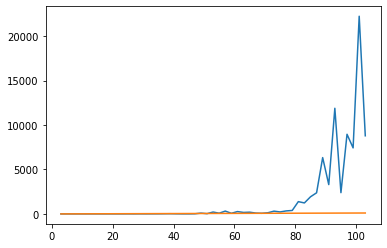

In [19]:
rvals = []
vals = []
for r in range(3,105,2):
    Cbar = RT_ROU(r,1,4)
    rvals.append(r)
    vals.append(abs(np.linalg.det(Cbar)))
    
plt.plot(rvals,vals)
plt.plot(rvals,rvals)
plt.show()

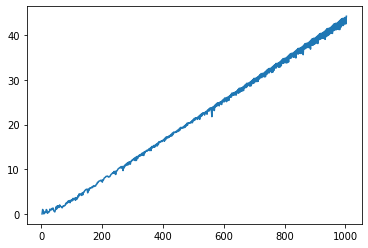

0.1395717247353937
-3.9452480169098862
0.9992556750511323


In [143]:
plt.close()
valspi = np.array(vals)/(np.pi)
plt.plot(rvals,valspi)
plt.show()

slope, intercept, r_value, p_value, std_err = sp.stats.linregress(rvals,vals)
print(slope)
print(intercept)
print(r_value)

In [10]:
for r in range(3,155,8):
    K = blocks(r,1,4)[4]
    print("r = %s" % r)
    m = (r-1)//2
    print("m = %s" % m)
    print(K)
    print("----------------------")

NameError: name 'blocks' is not defined

In [11]:
RT(57,1,8)

NameError: name 'RT' is not defined

In [76]:
Cbar, U, M, L, K = blocks_ROU(11,1,4)
#print(Cbar)
print(K)

[[ 0. +0.j  -0.4-0.9j  0. +0.j ]
 [-1. -0.3j  0. +0.j   0. +0.j ]
 [-0.1+1.j  -0.8-0.5j -0.1-1.j ]]


In [77]:
Cbar, U, M, L, K = blocks_ROU(13,1,4)
#print(Cbar)
print(K)

[[ 0. +0.j   0.7-0.7j  0. +0.j  -0.6+0.8j]
 [ 0.1+1.j   0. +0.j   0. +0.j   0. +0.j ]
 [ 0. +0.j  -0.9+0.5j  0.1-1.j   0.7-0.7j]
 [-0.7-0.7j  0. +0.j  -0.7+0.7j  1. -0.2j]]


In [78]:
Cbar, U, M, L, K = blocks_ROU(15,1,4)
#print(Cbar)
print(K)

[[ 0. +0.0e+00j  1. +2.1e-01j  0. +0.0e+00j -0.3-9.5e-01j  0. +0.0e+00j]
 [ 0. +0.0e+00j -1. -8.0e-16j  0. +0.0e+00j  0. +0.0e+00j  0. +0.0e+00j]
 [ 0. +0.0e+00j -0.3+9.5e-01j -0.8-5.9e-01j -0.7-7.4e-01j  1. +0.0e+00j]
 [ 0.3+9.5e-01j  0. +0.0e+00j -0.1+9.9e-01j -1. -8.0e-16j  0.7-7.4e-01j]
 [-0.5-8.7e-01j  0. +0.0e+00j -0.8-5.9e-01j  0. +0.0e+00j  0. +0.0e+00j]]


In [84]:
schur, C_inv = C_inverse(11,1,4)
print(schur)
print(schur.shape)

schur2 = schur_comp(schur,2)
print(schur2)

[[ 0. +0.j  -1.1-0.2j -0.8-0.5j]
 [-1. -0.3j  0. +0.j   0. +0.j ]
 [-0.1+1.j  -0.8-0.5j -0.1-1.j ]]
(3, 3)
True
[[0.4-0.2j]]


In [87]:
schur, C_inv = C_inverse(27,1,4)
print(schur)
print(schur.shape)

schur2 = schur_comp(schur,4)
print(schur2)

schur3 = schur_comp(schur2,3)
print(schur3)

schur4 = schur_comp(schur3,1)
print(schur4)

[[ 0. +0.0e+00j  0. +0.0e+00j -0.5+8.7e-01j -0.8-6.4e-01j -1. -1.2e-01j
  -0.2+9.8e-01j  1. +0.0e+00j -0.6-8.0e-01j  0.2-9.8e-01j]
 [ 0. +0.0e+00j -0.2+9.8e-01j  0. +0.0e+00j -0.4+9.2e-01j -0.9-3.4e-01j
  -0.6-8.0e-01j  0.9+4.5e-01j -0.2+9.8e-01j -0.3+9.6e-01j]
 [ 1. +4.4e-01j  0. +0.0e+00j -0.2-9.2e-02j  0. +0.0e+00j  1.6+6.9e-01j
   0. +0.0e+00j -1.5-6.4e-01j -0.8-5.5e-01j  0.1+1.0e+00j]
 [ 0. +0.0e+00j -1. -2.3e-01j  0. +0.0e+00j -1. -2.2e-16j  0. +0.0e+00j
   0. +0.0e+00j  0. +0.0e+00j  0. +0.0e+00j  0. +0.0e+00j]
 [ 0. +0.0e+00j -0.5-1.9e+00j  0. +0.0e+00j -0.5-1.9e+00j  0. +0.0e+00j
   0.3+1.3e+00j -0.6+2.7e-01j -0.5-1.9e+00j -0.8-1.5e+00j]
 [ 0.2+9.8e-01j  0. +0.0e+00j  0.8+6.4e-01j  0. +0.0e+00j -0.3+9.6e-01j
  -1. -2.2e-16j  0.2-9.8e-01j  0.7-7.3e-01j -0.9-3.4e-01j]
 [ 0. +0.0e+00j  2. -3.5e-01j  0. +0.0e+00j  1.9-3.4e-01j  0. +0.0e+00j
  -1.3+2.2e-01j -1. -5.6e-16j  1. -2.3e-01j -0.2-9.8e-01j]
 [-0.7-7.3e-01j  0. +0.0e+00j -0.1-1.0e+00j  0. +0.0e+00j -0.9-3.4e-01j
   0. +0.0e

In [12]:
for r in range(11,57,8):
    schur, C_inv = C_inverse(r,1,4)
    #print(schur)
    print(schur.shape)
    #print(np.linalg.det(schur))
    SS = np.conj(schur.T)@schur
    #print(SS)

    

    Q, U = np.linalg.qr(SS)
    #print(Q)
    print("------------------")
    #print(U)
    for i in range(U.shape[0]):
        print(U[i,i])
        
    print("----------------------------------------")

NameError: name 'C_inverse' is not defined

In [13]:
schur, C_inv = C_inverse(19,1,4)
print(schur)
print(schur.shape)

U = schur[0:3,0:3]
print(np.linalg.det(U)!=0)
M = schur[0:3,3:]
L = schur[3:,0:3]
K = schur[3:,3:]

schur2 = K-L@(np.linalg.inv(U))@M
print(schur2)
print(np.linalg.det(schur2)!=0)

U = schur2[0:2,0:2]
print(np.linalg.det(U)!=0)
M = schur2[0:2,2:]
L = schur2[2:,0:2]
K = schur2[2:,2:]

schur3 = K-L@(np.linalg.inv(U))@M
print(schur3)
print(np.linalg.det(schur3)!=0)

print("----------------------------------------")

Q, U = np.linalg.qr(schur)
#print(Q)
print("------------------")
for i in range(U.shape[0]):
    print(U[i,i])

NameError: name 'C_inverse' is not defined

In [14]:
schur, C_inv = C_inverse(27,3,4)
print(schur)
print(schur.shape)

U = schur[0:4,0:4]
print(np.linalg.det(U)!=0)
M = schur[0:4,4:]
L = schur[4:,0:4]
K = schur[4:,4:]

schur2 = K-L@(np.linalg.inv(U))@M
print(schur2)
print(np.linalg.det(schur2)!=0)

U = schur2[0:3,0:3]
print(np.linalg.det(U)!=0)
M = schur2[0:3,3:]
L = schur2[3:,0:3]
K = schur2[3:,3:]

schur3 = K-L@(np.linalg.inv(U))@M
print(schur3)
print(np.linalg.det(schur3)!=0)

U = schur3[0:2,0:2]
print(np.linalg.det(U)!=0)
M = schur3[0:2,2:]
L = schur3[2:,0:2]
K = schur3[2:,2:]

schur4 = K-L@(np.linalg.inv(U))@M
print(schur4)
print(np.linalg.det(schur4)!=0)

print("----------------------------------------")

Q, U = np.linalg.qr(schur)
#print(Q)
print("------------------")
for i in range(U.shape[0]):
    print(U[i,i])

NameError: name 'C_inverse' is not defined

In [15]:
for r in range(11,300,8):
    schur, C_inv = C_inverse(r,3,4)
    if schur[-1,-1] == 0:
        print(r)
        print(schur[-1,-1])
        print("-------------------------------")

NameError: name 'C_inverse' is not defined

In [ ]:
R = RT(11,1,4)
print(R)
R[[1,2]] = R[[2,1]]
print(R)

In [ ]:
C, U, M, L, K = blocks_ROU(11,1,4)

schur = K-L@(np.linalg.inv(U))@M

print(schur)
print(np.linalg.det(schur))